A notebook for visualizing Attention Weights
==========

    This notebook illustrates how to visualize attention weights with Lm4Ling

Loading a pretrained transformer language model
------------

The first thing to do is to make sure Lm4Ling is in the `PYTHONPATH`.
Check that the directory Lm4Ling is a in subdirectory of your `PYTHONPATH`
otherwise edit your `.bash_profile` (or `.bashrc`) and add:

```
export PYTHONPATH= DIR_WHERE_LM4LING_IS_LOCATED:$PYTHONPATH
```
and restart a new terminal.


In [1]:
from Lm4Ling.nnlm import load_transformer_model

In [2]:
encoder, lm = load_transformer_model("/Users/bcrabbe/wiki30",cpu=True)

Viewing attention matrices with BertViz
------------------

BertViz is a package for vizualizing attention matrices (https://github.com/jessevig/bertviz)

Start by installing BertViz with 

```
pip install bertviz
```

then 

In [3]:
from bertviz import head_view

Process a sentence with a language model

In [4]:
tokens = "The cat that the gardeners fed sleeps on the mat".split()
attn,tokens   = lm.attention_viz(tokens,encoder,device='cpu')

View the attention matrices

In [5]:
head_view(attn,tokens)

<IPython.core.display.Javascript object>

To get the attention matrices at a target point, truncate the sentence

In [6]:
tokens        = "The cat that the gardeners fed".split()
attn,tokens   = lm.attention_viz(tokens,encoder,device='cpu')

In [7]:
head_view(attn, tokens)

<IPython.core.display.Javascript object>

Heatmap view
----------

With standard statistical packages we can perform standard plots such as heatmaps

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

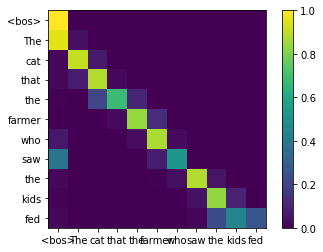

In [13]:
#extracts the first head in the first layer
X = (attn[0][0][0]).numpy() #[layer][batch=0][head]

N = len(tokens)
plt.xticks(range(N),tokens)
plt.yticks(range(N),tokens)
plt.imshow(X)
plt.colorbar()


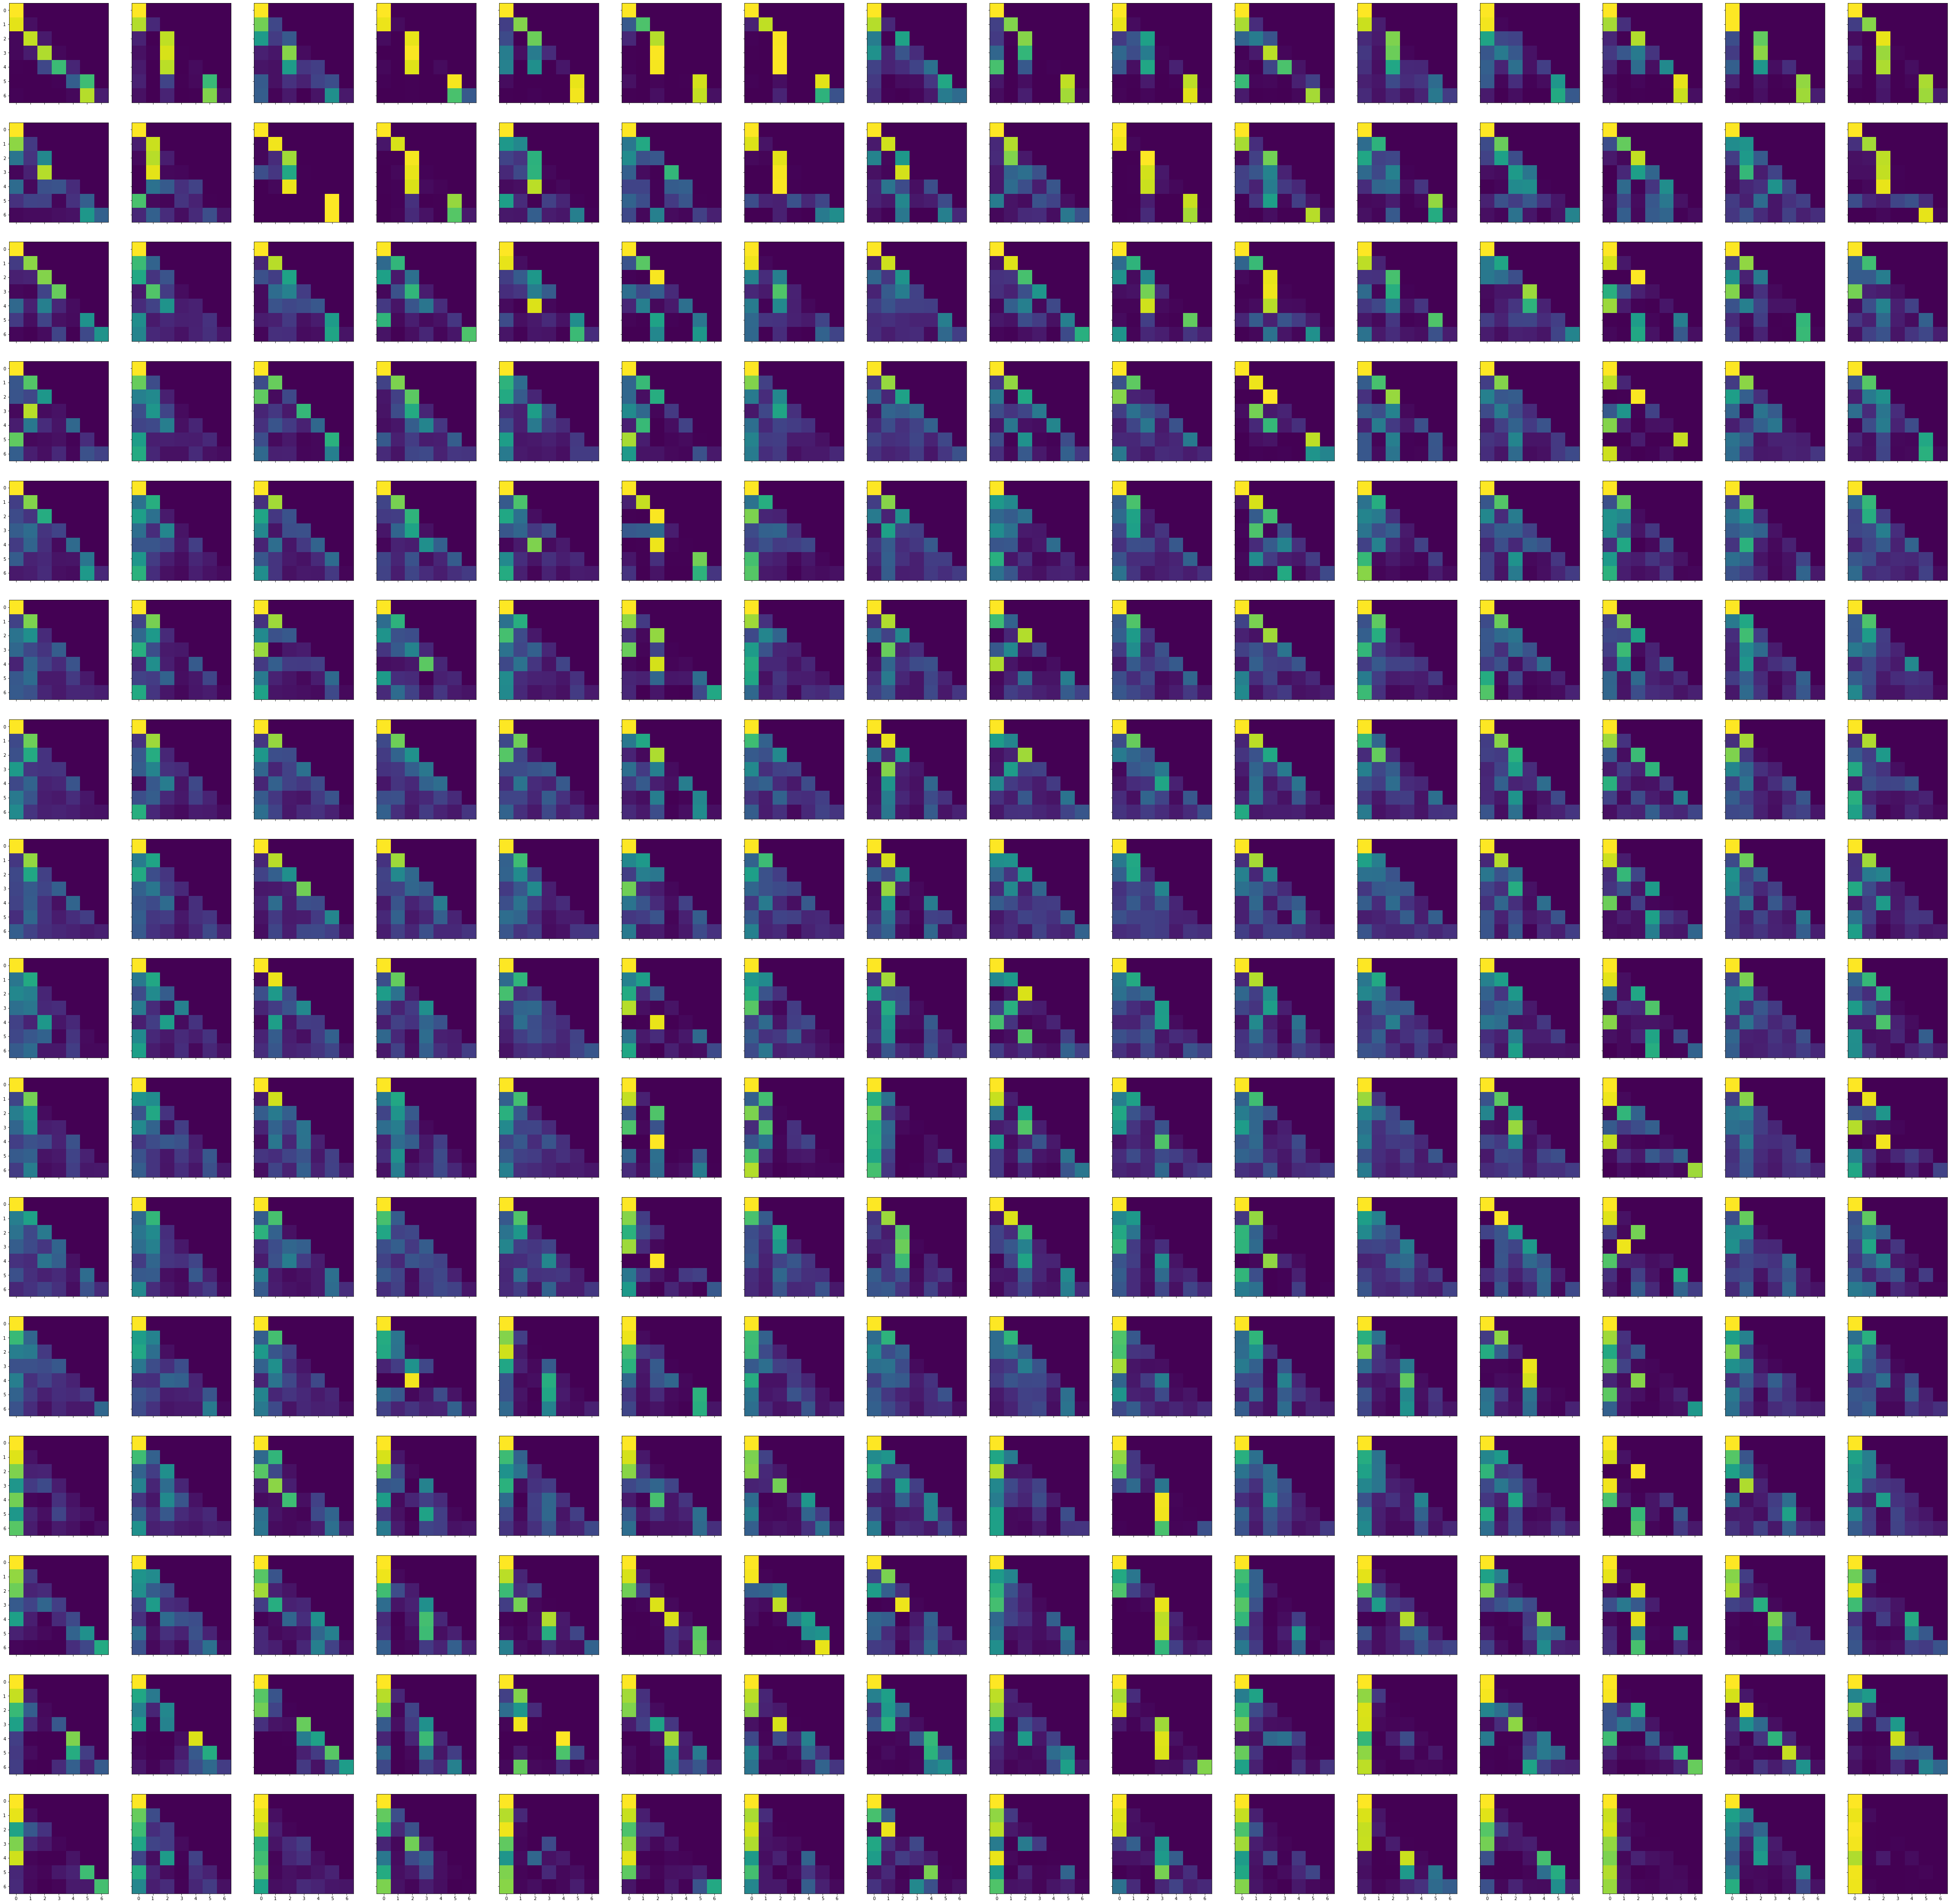

In [10]:
#Extracts and plots all heads in all layers
#not very readable

# plots at the bottom are the upper layers (or closer to the output)

def plot_all_attn(attn):
    
    Nlayers = len(attn)
    Nheads  = (attn[0].shape[1])

    fig, axs = plt.subplots(Nlayers,Nheads, sharex='col', sharey='row',figsize=(Nlayers*5,Nheads*5))

    for idx in range(Nlayers):
        layer = attn[idx].numpy()[0]
        for jdx in range(Nheads):
            axs[idx,jdx].imshow(layer[jdx])
            
plot_all_attn(attn)

[('fly', -10.274134635925293), ('flies', -8.851147651672363), ('sing', -10.178814888000488), ('sings', -10.106499671936035), ('sleep', -11.116934776306152), ('sleeps', -11.399333000183105)]


<IPython.core.display.Javascript object>


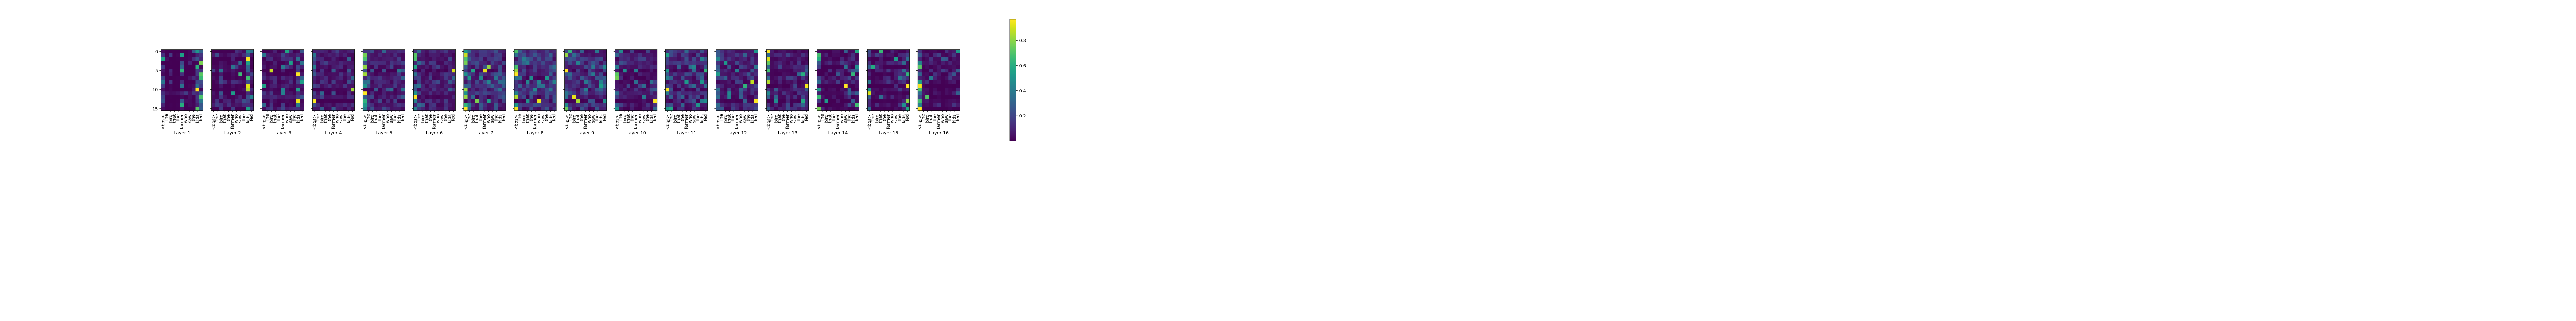

In [15]:
#Plots a summary of the attention for the last prediction
#1 plot per layer

%matplotlib notebook

def last_prediction(attn,tokens):

    X = (attn[0][0][0]).numpy()  #[layer][0][head]
    N = len(tokens)

    Nlayers = len(attn)

    fig, axes = plt.subplots(1,Nlayers, sharex='col',sharey='row')
    fig.set_figheight(5)
    fig.set_figwidth(40)

    for (idx, layer,ax) in zip(range(Nlayers),attn,axes):
        layer = layer.numpy()[0]
        layerlast = np.array([head[-1] for head in layer])
        im = ax.imshow(layerlast)
        ax.set_xticks(np.arange(len(tokens)))
        ax.set_xticklabels(tokens,rotation=90)
        ax.set_xlabel('Layer %d'%(idx+1,))
    
    fig.colorbar(im, ax=axes.ravel().tolist())

tokens              = "The bird that the farmer who saw the kids fed".split()
attn,tokens,preds   = lm.attention_viz(tokens,encoder,device='cpu',candidates=['fly','flies','sing','sings','sleep','sleeps'])
print(preds)
last_prediction(attn,tokens)